# How to rediscover the Higgs boson yourself!
This notebook uses ATLAS Open Data http://opendata.atlas.cern to show you the steps to rediscover the Higgs boson yourself!

The idea is that you add extra cuts to increase the ratio of signal ($H \rightarrow ZZ \rightarrow \ell\ell\ell\ell$) to background ($Z, t\bar{t}, ZZ \rightarrow \ell\ell\ell\ell$)

First, try to reduce the amount of $Z$ and $t\bar{t}$ background, since these are quite different to the signal.

Then, try to reduce the amount of $ZZ \rightarrow \ell\ell\ell\ell$, whilst keeping $H \rightarrow ZZ \rightarrow \ell\ell\ell\ell$ signal

The datasets used in this notebook have already been filtered to include at least 4 leptons per event, so that processing is quicker.

<!-- <CENTER><img src="HZZ_feynman.pdf" style="width:40%"></CENTER> -->

## First time setup
This first cell only needs to be run the first time you open this notebook on your computer. 

If you close jupyter and re-open on the same computer, you won't need to run this first cell again.

If you re-open on binder, you will need to run this cell again.

If you run into a problem of "uproot not being available", Kernel -> Restart & Run All

In [2]:
pip uninstall uproot
pip install uproot

  Using cached uproot-4.1.9-py2.py3-none-any.whl (301 kB)


## Imports and Defaults

In [2]:
import uproot
import pandas as pd
import time
import math
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-talk')

from matplotlib import rcParams
import warnings
warnings.filterwarnings('ignore')
import glob
import random

import infofile

In [3]:
SMALL_SIZE = 10
MEDIUM_SIZE = 12
BIGGER_SIZE = 18
plt.rc('figure', figsize=(10,6))
plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)     # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)     # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)     # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)   # fontsize of the figure title

## Take a look at the data

opening the root file with uproot module

In [30]:
file = uproot.open('Input/MC/skim.mc_160155.ggH125_ZZ4lep.root')

Uproot reads the root file as a TTree object:

In [31]:
file.classnames()

{'mini;1': 'TTree'}

These are the branch names of the open data and [here](http://opendata.atlas.cern/books/current/openatlasdatatools/_book/variable_names.html) is the description for every variable.

In [32]:
tree = file['mini']
tree.keys()

['runNumber',
 'eventNumber',
 'channelNumber',
 'mcWeight',
 'pvxp_n',
 'vxp_z',
 'scaleFactor_PILEUP',
 'scaleFactor_ELE',
 'scaleFactor_MUON',
 'scaleFactor_BTAG',
 'scaleFactor_TRIGGER',
 'scaleFactor_JVFSF',
 'scaleFactor_ZVERTEX',
 'trigE',
 'trigM',
 'passGRL',
 'hasGoodVertex',
 'lep_n',
 'lep_truthMatched',
 'lep_trigMatched',
 'lep_pt',
 'lep_eta',
 'lep_phi',
 'lep_E',
 'lep_z0',
 'lep_charge',
 'lep_type',
 'lep_flag',
 'lep_ptcone30',
 'lep_etcone20',
 'lep_trackd0pvunbiased',
 'lep_tracksigd0pvunbiased',
 'met_et',
 'met_phi',
 'jet_n',
 'alljet_n',
 'jet_pt',
 'jet_eta',
 'jet_phi',
 'jet_E',
 'jet_m',
 'jet_jvf',
 'jet_trueflav',
 'jet_truthMatched',
 'jet_SV0',
 'jet_MV1']

variable dtypes:

In [33]:
tree.show()

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
runNumber            | int32_t                  | AsDtype('>i4')
eventNumber          | int32_t                  | AsDtype('>i4')
channelNumber        | int32_t                  | AsDtype('>i4')
mcWeight             | float                    | AsDtype('>f4')
pvxp_n               | int32_t                  | AsDtype('>i4')
vxp_z                | float                    | AsDtype('>f4')
scaleFactor_PILEUP   | float                    | AsDtype('>f4')
scaleFactor_ELE      | float                    | AsDtype('>f4')
scaleFactor_MUON     | float                    | AsDtype('>f4')
scaleFactor_BTAG     | float                    | AsDtype('>f4')
scaleFactor_TRIGGER  | float                    | AsDtype('>f4')
scaleFactor_JVFSF    | float                    | AsDtype('>f4')
scaleFactor_ZVERTEX  | float                    | AsDtype(

and the dataframe of Input/MC/skim.mc_160155.ggH125_ZZ4lep.root :

In [34]:
dataframe = pd.DataFrame(tree.arrays(["lep_n","lep_pt","lep_eta","lep_phi","lep_charge","lep_type","lep_etcone20","lep_trackd0pvunbiased","lep_tracksigd0pvunbiased",
                         "mcWeight","scaleFactor_PILEUP","scaleFactor_ELE","scaleFactor_MUON", # add more variables here if you make cuts on them
                         "scaleFactor_TRIGGER"], library='np'))

In [35]:
dataframe

,lep_n,lep_pt,lep_eta,lep_phi,lep_charge,lep_type,lep_etcone20,lep_trackd0pvunbiased,lep_tracksigd0pvunbiased,mcWeight,scaleFactor_PILEUP,scaleFactor_ELE,scaleFactor_MUON,scaleFactor_TRIGGER
0,4,"[45343.48, 43711.83, 14819.154, 10125.892]","[1.6846752, 0.70315117, 1.2364899, 0.18344826]","[-0.8843927, 1.349409, 2.572214, 2.052695]","[1.0, -1.0, 1.0, -1.0]","[13, 13, 13, 13]","[0.0, 0.0, 297.02203, 230.62376]","[0.0026179662, 0.0030312345, 0.006621156, 0.02...","[0.013645193, 0.013279222, 0.018782066, 0.0306...",1.0,2.186532,1.000000,1.005375,1.008973
1,4,"[28012.63, 27512.105, 22682.914, 13098.042]","[-0.030784028, 1.6908206, 0.81628054, -0.46491...","[0.34003505, 1.8132361, -2.5851636, -2.818021]","[-1.0, 1.0, -1.0, 1.0]","[11, 11, 11, 11]","[986.37476, 4452.057, 3977.2703, 606.4433]","[-0.0025578882, -0.03705673, 0.007993726, -0.0...","[0.012049048, 0.027970737, 0.015717374, 0.0166...",1.0,2.186532,0.836342,1.000000,0.998448
2,4,"[51887.992, 38080.87, 15943.868, 7891.956]","[-0.63595164, -0.675441, 0.48177192, 0.051031344]","[-0.6980156, 2.4176576, 2.4832828, -1.237989]","[1.0, -1.0, 1.0, -1.0]","[11, 11, 13, 13]","[736.42676, 1642.4374, 128.55412, 0.0]","[-0.22527732, -0.0033340934, -0.015867306, -0....","[0.03939201, 0.014445234, 0.017794391, 0.02270...",1.0,2.186532,0.907789,1.003515,0.998415
3,4,"[53021.414, 34785.098, 17236.086, 13521.205]","[2.3950324, 2.1612413, 2.4385293, 2.3563683]","[2.3824282, -0.60711265, -2.3902664, 0.057531204]","[1.0, -1.0, 1.0, -1.0]","[13, 13, 13, 13]","[83.940926, 3807.2048, 98.96532, 145.70934]","[0.00015653108, 0.05033925, -0.009542804, 0.00...","[0.017278496, 0.025868746, 0.029606774, 0.0321...",1.0,2.186532,1.000000,1.003346,0.998160
4,4,"[106792.266, 56740.06, 19936.986, 17110.123]","[0.37637904, -0.056279708, -0.29121995, -0.128...","[-0.2181424, -0.60003674, -2.479585, -0.9558021]","[-1.0, -1.0, 1.0, 1.0]","[13, 11, 13, 11]","[-64.39909, 1748.1519, 352.18817, 993.18823]","[-0.0016679185, 0.0051789535, 0.008057228, 0.0...","[0.008726434, 0.011211771, 0.027054666, 0.0237...",1.0,2.186532,0.900409,0.996961,1.001319
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21778,4,"[53366.38, 25010.566, 13887.056, 6836.6123]","[0.4141898, -0.89925605, 0.93896306, 1.3822924]","[1.999586, -0.8151894, -2.5284522, -1.0421318]","[-1.0, 1.0, -1.0, 1.0]","[13, 13, 13, 13]","[1093.1644, 152.36299, -527.5917, 216.3054]","[0.006448926, -0.026552308, -0.069247246, 0.00...","[0.015933726, 0.014126759, 0.021360159, 0.0299...",1.0,0.000000,1.000000,0.996446,0.983063
21779,4,"[26235.773, 19945.74, 12667.979, 6113.178]","[0.6035726, 2.057042, 0.034301862, -1.7492045]","[-2.3436122, 0.55222994, 0.7073217, -1.593352]","[1.0, -1.0, -1.0, 1.0]","[13, 11, 13, 11]","[85.587395, 316.94925, 99.1926, -1723.1538]","[0.018318724, 0.13138853, 0.025159873, -0.0641...","[0.014601233, 0.05034737, 0.020155422, 0.05524...",1.0,0.000000,0.923830,0.987409,0.951555
21780,4,"[113711.22, 39709.664, 19046.441, 7192.3896]","[-0.25260678, -0.17231984, -0.011982891, 0.426...","[2.9689577, -2.905566, 0.78501594, 1.5147935]","[-1.0, 1.0, 1.0, -1.0]","[11, 11, 11, 11]","[1133.231, 599.7344, 1400.2938, 2634.9456]","[0.028947892, -0.03708069, -0.0026026403, 0.03...","[0.0110487295, 0.017592417, 0.022640988, 0.040...",1.0,0.000000,0.820637,1.000000,0.999885
21781,4,"[81008.18, 37872.652, 27580.652, 8944.857]","[-0.44576034, -0.048047945, -0.7713596, 0.5234...","[-2.6115463, -2.4405189, -0.7457405, 1.9322467]","[-1.0, 1.0, 1.0, -1.0]","[11, 11, 11, 11]","[100.21791, 1422.012, 1866.0088, -2.7981358]","[0.014056118, 0.0062236153, 0.022293368, 0.018...","[0.011099207, 0.0132447295, 0.014554311, 0.047...",1.0,0.000000,0.863667,1.000000,0.999984


## To setup everytime
Cell -> Run All Below

to be done every time you re-open this notebook

In [4]:
lumi = 1000
                                                                                                                                  
tuple_path = "Input/"

stack_order = ['data',r'$Z,t\bar{t}$','ZZ',r'$H \rightarrow ZZ \rightarrow \ell\ell\ell\ell$']

In [25]:
samples = {

    'data': {
        'list' : ['DataEgamma','DataMuons']
    },

    r'$Z,t\bar{t}$' : {
        'list' : ['Zee','Zmumu','ttbar_lep'],
        'color' : "#8700da"
    },

    'ZZ' : {
        'list' : ['ZZ'],
        'color' : "#f90000"
    },

    r'$H \rightarrow ZZ \rightarrow \ell\ell\ell\ell$' : {
        'list' : ['ggH125_ZZ4lep','VBFH125_ZZ4lep'],
        'color' : "#4faeff"
    }

}

In [6]:
def get_data_from_files(cutval=0):

    data = {}
    
    for s in samples:
        print(s+':')
        frames = []
        for val in samples[s]['list']:
            prefix = "MC/skim.mc_"
            if s == 'data':
                prefix = "Data/skim."
            else: prefix += str(infofile.infos[val]["DSID"])+"."
            fileString = tuple_path+prefix+val+".root"
            print(fileString)
            f = glob.glob(fileString,recursive=False)[0]
            if f != "":
                temp = read_file(f,val,cutval)
                frames.append(temp)
            else:
                print("Error: "+val+" not found!")
        data[s] = pd.concat(frames)

    return data

In [7]:
def mllll_window(mllll):
    return 120 < mllll < 130

In [8]:
def calc_weight(mcWeight,scaleFactor_PILEUP,scaleFactor_ELE,
                scaleFactor_MUON, scaleFactor_TRIGGER):
    return mcWeight*scaleFactor_PILEUP*scaleFactor_ELE*scaleFactor_MUON*scaleFactor_TRIGGER

In [9]:
def get_xsec_weight(totalWeight,sample):
    info = infofile.infos[sample]
    weight = (lumi*info["xsec"])/(info["sumw"]*info["red_eff"])
    weight *= totalWeight
    return weight

In [10]:
def correlations(data, title, **kwds):
    """Calculate pairwise correlation between features.
    
    Extra arguments are passed on to DataFrame.corr()
    """
    # simply call df.corr() to get a table of
    # correlation values if you do not need
    # the fancy plotting
    corrmat = data.corr(**kwds)

    fig, ax1 = plt.subplots(ncols=1, figsize=(6,5))
    
    opts = {'cmap': plt.get_cmap("RdBu"),
            'vmin': -1, 'vmax': +1}
    heatmap1 = ax1.pcolor(corrmat, **opts)
    plt.colorbar(heatmap1, ax=ax1)

    ax1.set_title(title+" Correlations")

    labels = corrmat.columns.values
    for ax in (ax1,):
        # shift location of ticks to center of the bins
        ax.set_xticks(np.arange(len(labels))+0.5, minor=False)
        ax.set_yticks(np.arange(len(labels))+0.5, minor=False)
        ax.set_xticklabels(labels, minor=False, ha='right', rotation=70)
        ax.set_yticklabels(labels, minor=False)
        
    plt.tight_layout()

In [26]:
def plot_data(data):

    bins = [80 + x*5 for x in range(35) ]
    data_x = [82.5 + x*5 for x in range(34) ]

    data_mllll = []
    data_mllll_errors = []

    mc_mllll = []
    mc_weights = []
    mc_colors = []
    mc_labels = []
    mc_in_mllll_window = [] # list for numbers of MC events with 120 < mllll < 130 GeV

    for s in stack_order:
        if s == "data":
            data_mllll,_ = np.histogram(data[s].mllll.values, bins=bins)
            data_mllll_errors = np.sqrt(data_mllll)
        else:
            mc_labels.append(s)
            mc_mllll.append(data[s].mllll.values)
            mc_colors.append(samples[s]['color'])
            mc_weights.append(data[s].totalWeight.values)
            mc_in_mllll_window.append([data[s].totalWeight.values[mllll_iter] for mllll_iter in range(len(data[s].mllll.values)) if 120 < data[s].mllll.values[mllll_iter] < 130])
    
    HZZ_in_mllll_window = sum(mc_in_mllll_window[2]) # number signal MC events with 120 < mllll < 130 GeV
    background_in_mllll_window = sum(mc_in_mllll_window[0]+mc_in_mllll_window[1]) # number background MC events with 120 < mllll < 130 GeV
    SoversqrtB = HZZ_in_mllll_window/math.sqrt(background_in_mllll_window) # calculate significance
    print('Signal/sqrt(Background) for 120<mllll<130 '+str(SoversqrtB))
    
    top = np.amax(data_mllll)+math.sqrt(np.amax(data_mllll))

    plt.figure()
    plt.hist(mc_mllll,bins=bins,weights=mc_weights,stacked=True,color=mc_colors, label=mc_labels)
    plt.errorbar( x=data_x, y=data_mllll, yerr=data_mllll_errors, fmt='ko', label='Data')

    #X = np.arange(115,135,5) # gives list [115,120,125,130]
    #data_in_window = data_mllll[7:11] # gives list of data y value for [115,120,125,130]
    #x = np.sum(X*data_in_window)/np.sum(data_in_window) # Gaussian mean
    #width = np.sqrt(np.abs(np.sum((X-x)**2*data_in_window)/np.sum(data_in_window))) # Gaussian width
    #fit = lambda t : np.amax(data_in_window)*np.exp(-(t-x)**2/(2*width**2)) # Gaussian fit
    #plt.plot(X, fit(X), '-') # plot Gaussian
    
    plt.xlabel(r'$M_{\ell\ell\ell\ell}$ [GeV]',fontname='sans-serif',horizontalalignment='right',x=1.0,fontsize=11)

    plt.ylabel(r'Events',fontname='sans-serif',horizontalalignment='right',y=1.0,fontsize=11)
    #plt.yscale('log')                                                                                                                                                                        
    plt.ylim(bottom=0,top=top)

    ax = plt.gca()
    plt.text(0.5,0.97,r'$\mathbf{{ATLAS}}$ Open Data',ha="center",va="top",family='sans-serif',transform=ax.transAxes,fontsize=13)
    plt.text(0.5,0.92,'for education only',ha="center",va="top",family='sans-serif',transform=ax.transAxes,style='italic',fontsize=8)
    plt.text(0.5,0.9,r'$\sqrt{s}=8\,\mathrm{TeV},\;\int L\,dt=1\,\mathrm{fb}^{-1}$',ha="center",va="top",family='sans-serif',transform=ax.transAxes)

    plt.legend()
    plt.tight_layout()

    plt.savefig("plot.png")
    
    # scatter plot of signal and background lep_n vs mllll
    plt.figure()
    for s in stack_order:
       if s != 'data': plt.scatter(data[s].lep_n,data[s].mllll,color=samples[s]['color'],label=s);
    plt.xlabel(r'Leptons',fontname='sans-serif',horizontalalignment='right',y=1.0,fontsize=11)
    plt.ylabel(r'$M_{\ell\ell\ell\ell}$ [GeV]',fontname='sans-serif',horizontalalignment='right',x=1.0,fontsize=11)
    plt.legend()
    plt.tight_layout()
    
    # scatter plot of signal and background lep_pt[0] vs mllll
    plt.figure()
    for s in stack_order:
       if s != 'data': plt.scatter(data[s].lep_pt.apply(lambda x: x[0]),data[s].mllll,color=samples[s]['color'],label=s)
    plt.legend()
    plt.tight_layout()
    
    # boxplot of signal and background mllll
    plt.figure()
    for s in stack_order:
       if s != 'data': data[s]['Process'] = s
    data_all = pd.concat([data[r'$Z,t\bar{t}$'],data['ZZ'],data[r'$H \rightarrow ZZ \rightarrow \ell\ell\ell\ell$']])
    data_all.boxplot(by='Process',column=["mllll"])
    
    # plot correlation matrices for signal and background
    correlations(pd.concat([data[r'$Z,t\bar{t}$'],data['ZZ']]),"background")
    correlations(data[r'$H \rightarrow ZZ \rightarrow \ell\ell\ell\ell$'], "signal")
    
    plt.show()
    return

In [12]:
def calc_mllll(lep_pts,lep_etas,lep_phis):
    theta_0 = 2*math.atan(math.exp(-lep_etas[0]))
    theta_1 = 2*math.atan(math.exp(-lep_etas[1]))
    theta_2 = 2*math.atan(math.exp(-lep_etas[2]))
    theta_3 = 2*math.atan(math.exp(-lep_etas[3]))
    p_0 = lep_pts[0]/math.sin(theta_0)
    p_1 = lep_pts[1]/math.sin(theta_1)
    p_2 = lep_pts[2]/math.sin(theta_2)
    p_3 = lep_pts[3]/math.sin(theta_3)
    pz_0 = p_0*math.cos(theta_0)
    pz_1 = p_1*math.cos(theta_1)
    pz_2 = p_2*math.cos(theta_2)
    pz_3 = p_3*math.cos(theta_3)
    px_0 = p_0*math.sin(theta_0)*math.cos(lep_phis[0])
    px_1 = p_1*math.sin(theta_1)*math.cos(lep_phis[1])
    px_2 = p_2*math.sin(theta_2)*math.cos(lep_phis[2])
    px_3 = p_3*math.sin(theta_3)*math.cos(lep_phis[3])
    py_0 = p_0*math.sin(theta_0)*math.sin(lep_phis[0])
    py_1 = p_1*math.sin(theta_1)*math.sin(lep_phis[1])
    py_2 = p_2*math.sin(theta_2)*math.sin(lep_phis[2])
    py_3 = p_3*math.sin(theta_3)*math.sin(lep_phis[3])
    sumpz = pz_0 + pz_1 + pz_2 + pz_3
    sumpx = px_0 + px_1 + px_2 + px_3
    sumpy = py_0 + py_1 + py_2 + py_3
    sumE = p_0 + p_1 + p_2 + p_3
    mllll = sumE**2 - sumpz**2 - sumpx**2 - sumpy**2
    return math.sqrt(mllll)/1000.

In [13]:
def calc_mll(lep_pts,lep_etas,lep_phis,lep_charges,lep_types):
    # this is only pseudo-code to tell you what to do!
    # you need to decide how to find i & j yourself
    # same-type-opposite-flavour
    mll = 2*lep_pts[i]*lep_pts[j!=i]
    cosh = math.cosh(lep_etas[i]-lep_etas[j!=i])
    cos = math.cos(lep_phis[i]-lep_phis[j!=i])
    mll *= ( cosh - cos )
    # Z mass 90 GeV
    return math.sqrt(mll)/1000.

## Uncommenting a new cut
If you add a cut: Cell -> Run All Below

In [14]:
def read_file(path,sample,cutval):
    start = time.time()
    print("\tProcessing: "+sample)
    mc = uproot.open(path)["mini"]
    
## --------------------------------------------------------------------------------------------------
## This is the only part that we needed to change to sort compability with 'uproot v.4.1'.

#     data = mc.pandas.df(["lep_n","lep_pt","lep_eta","lep_phi","lep_charge","lep_type","lep_etcone20","lep_trackd0pvunbiased","lep_tracksigd0pvunbiased",
#                          "mcWeight","scaleFactor_PILEUP","scaleFactor_ELE","scaleFactor_MUON", # add more variables here if you make cuts on them
#                          "scaleFactor_TRIGGER"], flatten=False)

    data = pd.DataFrame(mc.arrays(["lep_n","lep_pt","lep_eta","lep_phi","lep_charge","lep_type","lep_etcone20","lep_trackd0pvunbiased","lep_tracksigd0pvunbiased",
                         "mcWeight","scaleFactor_PILEUP","scaleFactor_ELE","scaleFactor_MUON", # add more variables here if you make cuts on them
                         "scaleFactor_TRIGGER"], library ='np')
                       )
## ---------------------------------------------------------------------------------------------------
    
    nIn = len(data.index)

    if 'Data' not in sample:
        data['totalWeight'] = np.vectorize(calc_weight)(data.mcWeight,data.scaleFactor_PILEUP,data.scaleFactor_ELE,data.scaleFactor_MUON,data.scaleFactor_TRIGGER)
        data['totalWeight'] = np.vectorize(get_xsec_weight)(data.totalWeight,sample)

    data.drop(["mcWeight","scaleFactor_PILEUP","scaleFactor_ELE","scaleFactor_MUON","scaleFactor_TRIGGER"], axis=1, inplace=True)
    
    # cut on minimum lepton pt
    
    # cut on lepton etcone20
    
    # cut on lepton d0
    
    # example of adding column that takes the return of the function cut_lep_pt_min
#     data['lep_pt_min'] = data.apply(cut_lep_pt_min,axis=1)
    
    # example of cut on minimum number of leptons passing baseline requirements
#     fail = data[ np.vectorize(cut_n_lep_min)(data.lep_pt_min) ].index
#     data.drop(fail, inplace=True)
    
    # cut on number of leptons
#     fail = data[ np.vectorize(cut_n_lep)(data.lep_n) ].index
#     data.drop(fail, inplace=True)
    
    # dataframe contents can be printed at any stage like this
    #print(data)

    # cut on lepton charge
    #fail = data[ np.vectorize(cut_lep_charge)(data.lep_charge) ].index
    #data.drop(fail, inplace=True)
    
    # cut on lepton type
#     fail = data[ np.vectorize(cut_lep_type)(data.lep_type) ].index
#     data.drop(fail, inplace=True)
    
    # cut on lepton pt
#     fail = data[ np.vectorize(cut_lep_pt)(data.lep_pt) ].index
#     data.drop(fail, inplace=True)
    
    # cut on deltaR
    #fail = data[ np.vectorize(cut_deltaR)(data.lep_eta,data.lep_phi...
    #data.drop(fail, inplace=True)
    
    # cut on minimum opposite-charge-same-type lepton pair invariant mass
    #fail = data[ np.vectorize(cut_OCST)(data....

    # calculation of Z boson candidate 1 invariant mass
    #data['mZ1'] = np.vectorize(calc_mZ1)(data.lep_pt,data.lep_eta,data.lep_phi)
    
    # cut on mZ1
#     fail = data[ np.vectorize(cut_mZ1)(data.mZ1) ].index
#     data.drop(fail, inplace=True)
    
    # calculation of Z boson candidate 2 invariant mass
    #data['mZ2'] = np.vectorize(calc_mZ2)(data....
    
    # cut on mZ2
    #fail = data[ np.vectorize(cut_mZ2)(data.mZ2) ].index
    #data.drop(fail, inplace=True)
    
    # calculation of 4-lepton invariant mass
    data['mllll'] = np.vectorize(calc_mllll)(data.lep_pt,data.lep_eta,data.lep_phi)

    mllll_window_list = data[ np.vectorize(mllll_window)(data.mllll) ] # return events with 120 < mllll < 130 GeV
    
    # example of expanding lep_pt list column into individual columns whilst requiring exactly 4 leptons
    # need to change cut_lep_n to require exactly 4 leptons
    #data[['lep1_pt','lep2_pt','lep3_pt','lep4_pt']] = pd.DataFrame(data.lep_pt.values.tolist(), index= data.index)

    # example of expanding lep_pt list column into individual columns without requiring exactly 4 leptons
    # need to do this for columns that you wish to use for fit_BDT
    if max(data.lep_n) < 5: 
       df_split = pd.DataFrame(data['lep_pt'].values.tolist(), columns=['lep1_pt','lep2_pt','lep3_pt','lep4_pt'], index=data.index)
       df_split['lep5_pt'] = 0
       df_split['lep6_pt'] = 0
    elif max(data.lep_n) < 6: 
       df_split = pd.DataFrame(data['lep_pt'].values.tolist(), columns=['lep1_pt','lep2_pt','lep3_pt','lep4_pt','lep5_pt'], index=data.index)
       df_split['lep6_pt'] = 0
    else: df_split = pd.DataFrame(data['lep_pt'].values.tolist(), columns=['lep1_pt','lep2_pt','lep3_pt','lep4_pt','lep5_pt','lep6_pt'], index=data.index)
    df_split.fillna(0, inplace=True)
    data = pd.concat([data, df_split], axis=1)
    
#     print(data[['lep_eta','lep_phi']])

    nOut = len(data.index)

    elapsed = time.time() - start
    print("\t\tTime taken: "+str(elapsed)+", nIn: "+str(nIn)+", nOut: "+str(nOut))
    
    return data

## Changing an already uncommented cut

If you change a cut: Cell -> Run All Below

If you uncomment a cut here, you also need to uncomment the corresponding cut in the cell above.

In [69]:
# cut on number of leptons
# def cut_n_lep(lep_n):
    # return when number of leptons is less than 4
#     return lep_n < 4

# cut on lepton charge
def cut_lep_charge(lep_charge):
    # return when sum of lepton charges is not equal to 0
    # exclamation mark (!) means "not"
    # so != means "not equal to"
    # first lepton is [0], 2nd lepton is [1] etc
    return lep_charge[0] + lep_charge[1] + lep_charge[2] + lep_charge[3] != 0

# cut on lepton type
def cut_lep_type(lep_type):
# for an electron lep_type is 11
# for a muon lep_type is 13
    sum_lep_type = lep_type[0] + lep_type[1] + lep_type[2] + lep_type[3]
    return (sum_lep_type != 44) and (sum_lep_type != 48) and (sum_lep_type != 52)

# cut on lepton pt
def cut_lep_pt(lep_pt):
# want to throw away events where the 2nd highest pt lepton used has lep_pt[1] < 15000 
# or
# 3rd highest pt lepton used has lep_pt[2] < 10000
    return (lep_pt[1] > 15000) or (lep_pt[2] > 10000)
# cut on minimum opposite-charge-same-type lepton pair invariant mass
#def cut_mOCST():
# want to throw away events if the invariant mass of any opposite-charge-same-type lepton pair is < 5

# cut on invariant mass of Z boson candidate 1
# def cut_mZ1(mZ1):
# # want invariant mass of same-type-opposite-charge lepton pair that's closest to Z mass (91 GeV) to be in range 50 < m < 106 GeV
#     return (mZ1>50) and (mz1<106)
# cut on invariant mass of Z boson candidate 2
#def cut_mZ2(mZ2):
# want invariant mass of remaining lepton pair that's closest to Z mass (91 GeV) to be in range 17.5 < m < 115 GeV
# advanced: vary the lower range monotically from 17.5 at mllll=120 to 50 at mllll=190, and constant above mllll=190

# cut on deltaR
# want to throw away leptons that are separated from all other leptons by deltaR = math.sqrt(delta(lep_eta)**2 + delta(lep_phi)**2) < 0.2
# want to throw away leptons that are separated from other leptons of the same type by deltaR = math.sqrt(delta(lep_eta)**2 + delta(lep_phi)**2) < 0.1

# example of returning list where every element passes minimum lep_pt requirement
def cut_lep_pt_min(data):
   return [data.lep_pt[i] if data.lep_pt[i] > 6000 else 0 for i in range(len(data.lep_pt))]

# cut on minimum lepton pt
# want to throw away muons with lep_pt < 6000
# want to throw away electrons with lep_pt < 7000

# cut on maximum lepton etcone20
# want to throw away muons with lep_etcone20/lep_pt < 0.3
# want to throw away electrons with lep_etcone20/lep_pt < 0.2

# cut on maximum lepton d0
# want to throw away muons with lep_trackd0pvunbiased/lep_tracksigd0pvunbiased < 3.5
# want to throw away electrons with lep_trackd0pvunbiased/lep_tracksigd0pvunbiased < 6.5

# example of cutting on length of list passing minimum requirements
def cut_n_lep_min(lep_pt_min):
   return len(lep_pt_min) < 4

data:
Input/Data/skim.DataEgamma.root
	Processing: DataEgamma
		Time taken: 0.05437326431274414, nIn: 89, nOut: 89
Input/Data/skim.DataMuons.root
	Processing: DataMuons
		Time taken: 0.05090022087097168, nIn: 112, nOut: 112
$Z,t\bar{t}$:
Input/MC/skim.mc_147770.Zee.root
	Processing: Zee
		Time taken: 0.06781816482543945, nIn: 720, nOut: 720
Input/MC/skim.mc_147771.Zmumu.root
	Processing: Zmumu
		Time taken: 0.09174585342407227, nIn: 1057, nOut: 1057
Input/MC/skim.mc_117050.ttbar_lep.root
	Processing: ttbar_lep
		Time taken: 0.07781672477722168, nIn: 897, nOut: 897
ZZ:
Input/MC/skim.mc_105986.ZZ.root
	Processing: ZZ
		Time taken: 0.16754746437072754, nIn: 1973, nOut: 1973
$H \rightarrow ZZ \rightarrow \ell\ell\ell\ell$:
Input/MC/skim.mc_160155.ggH125_ZZ4lep.root
	Processing: ggH125_ZZ4lep
		Time taken: 0.8614659309387207, nIn: 21783, nOut: 21783
Input/MC/skim.mc_160205.VBFH125_ZZ4lep.root
	Processing: VBFH125_ZZ4lep
		Time taken: 0.7789158821105957, nIn: 20954, nOut: 20954
Signal/sqrt(B

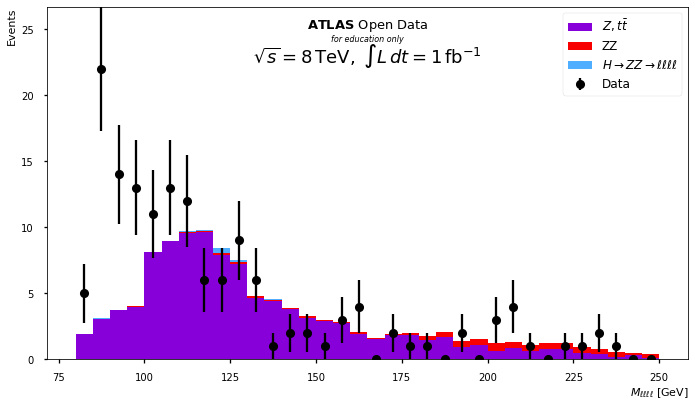

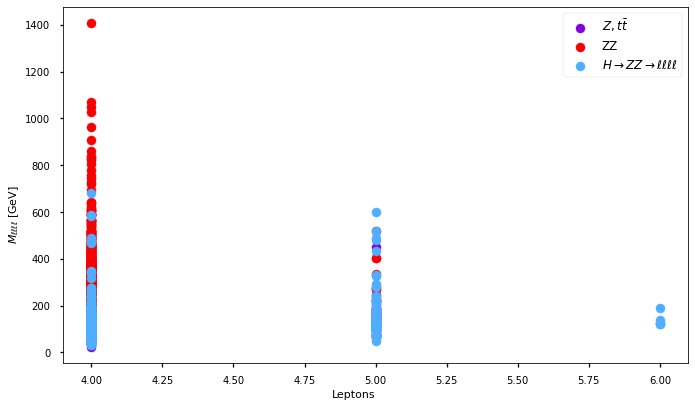

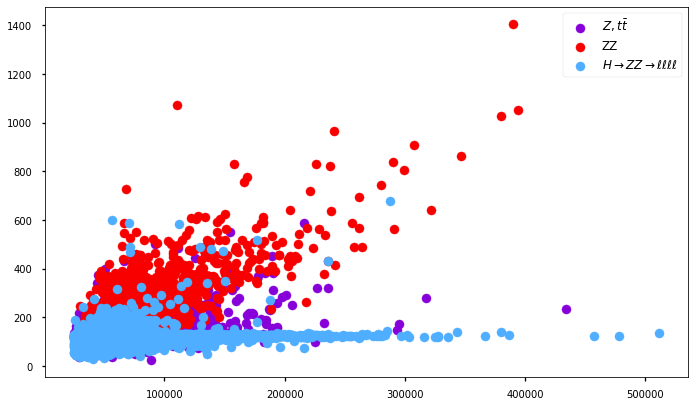

<Figure size 720x432 with 0 Axes>

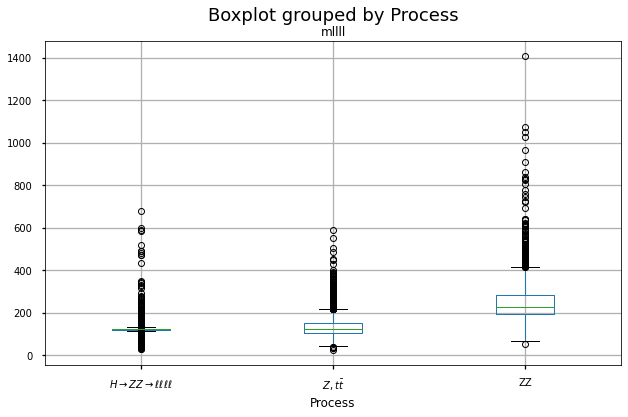

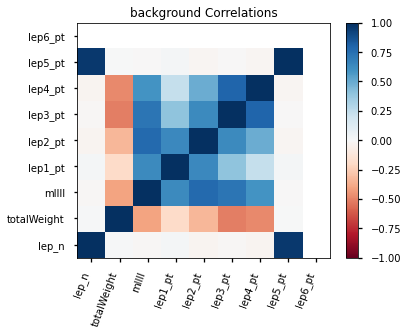

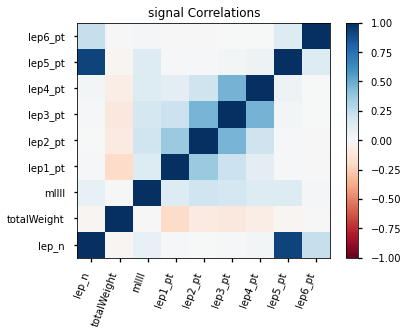

Time taken: 6.347990036010742


In [27]:
if __name__=="__main__":
    start = time.time()
    
    cutmin = 0
    cutmax = 1
    
    for c in range(cutmin,cutmax):
        data = get_data_from_files(c)
    
    plot_data(data)
    elapsed = time.time() - start
    print("Time taken: "+str(elapsed))